In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv("/content/summer.csv")

In [6]:
data.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [7]:
data.shape

(31165, 9)

# **1. In how many cities Summer Olympics is held so far?**

In [8]:
cities = data.City.value_counts().sort_values(ascending=False)
cities

London                   3567
Athens                   2149
Los Angeles              2074
Beijing                  2042
Sydney                   2015
Atlanta                  1859
Barcelona                1705
Seoul                    1546
Paris                    1396
Moscow                   1387
Montreal                 1305
Antwerp                  1298
Munich                   1185
Mexico                   1031
Tokyo                    1010
Helsinki                  889
Melbourne / Stockholm     885
Stockholm                 885
Rome                      882
Berlin                    875
Amsterdam                 710
St Louis                  470
Name: City, dtype: int64

In [9]:
print(len(data['City'].unique()))

22


# **2. Which Sport is having most number of Gold Medals so far?(Top 5)**

In [10]:
Gold_medal = data[(data.Medal=='Gold')]
Gold_medal = Gold_medal[['Sport','Medal']].groupby('Sport').count()
Gold_medal.reset_index(inplace=True)
Top_sports = Gold_medal.sort_values('Medal', ascending=False).head()
Top_sports

,Sport,Medal
0,Aquatics,1421
2,Athletics,1215
28,Rowing,890
17,Gymnastics,820
14,Fencing,552


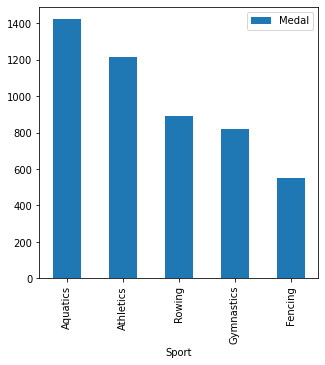

In [11]:
Top_sports.plot(x = 'Sport', y = 'Medal', kind = 'bar', figsize = (5,5))

# **3.Which Sport is having most number of Medals so far?(Top 5)**

In [12]:
medals_count = data.Sport.value_counts().sort_values(ascending=False).head()
medals_count

Aquatics      4170
Athletics     3638
Rowing        2667
Gymnastics    2307
Fencing       1613
Name: Sport, dtype: int64

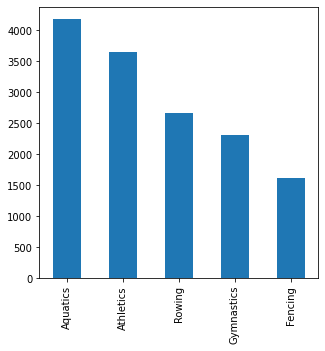

In [13]:
medals_count.plot(x = 'Sport', y = 'count', kind = 'bar', figsize = (5,5))

# **4. Which Player has won most number of Medals?(Top 5)**

In [14]:
max_medal = []
for player in data['Athlete'].unique():
    max_medal.append([player,len(data[data['Athlete']==player])])  
max_medal = pd.DataFrame(max_medal,columns=['Athlete','count'])
a = max_medal.sort_values(by='count',ascending=False).head()
a

,Athlete,count
18640,"PHELPS, Michael",22
7197,"LATYNINA, Larisa",18
9948,"ANDRIANOV, Nikolay",15
6591,"ONO, Takashi",13
5103,"MANGIAROTTI, Edoardo",13


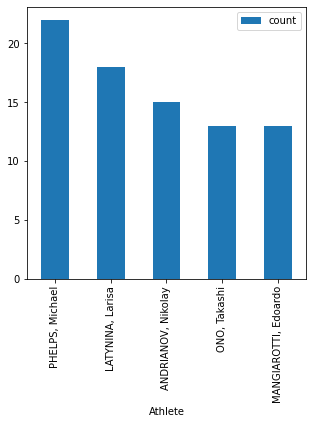

In [15]:
a.plot(x = 'Athlete', y = 'count', kind = 'bar', figsize = (5,5))

# **5. Which Player has won most number of Gold Medals?(Top 5)**

In [16]:
gold = []
gold_data = data[data['Medal']=='Gold']

for sport in gold_data['Athlete'].unique():
    gold.append([sport,len(gold_data[gold_data['Athlete']==sport])])
    
gold = pd.DataFrame(gold,columns=['Athlete','count'])
s=gold.sort_values(by='count',ascending=False).head()
s

,Athlete,count
6851,"PHELPS, Michael",18
3320,"SPITZ, Mark",9
2714,"LATYNINA, Larisa",9
4630,"LEWIS, Carl",9
907,"NURMI, Paavo",9


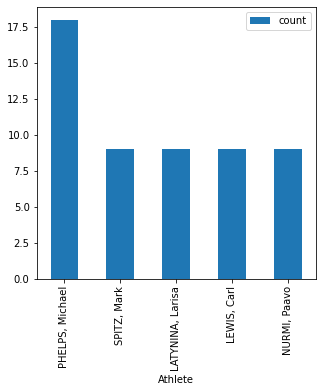

In [17]:
s.plot(x = 'Athlete', y = 'count', kind = 'bar', figsize = (5,5))

# **6. In which year India won first Gold Medal in Summer Olympics?**

In [18]:
gold_data = data[data['Medal']=='Gold']
country = gold_data[gold_data['Country']=='IND'].head(1)
country['Year']

5512    1928
Name: Year, dtype: int64

# **7. Which event is most popular in terms of number of players?(Top 5)**

In [19]:
event = []

for players in data['Event'].unique():
    event.append([players,len(data[data['Event']==players])])
    
event = pd.DataFrame(event,columns=['Event','No_of_players'])
e=event.sort_values(by='No_of_players',ascending=False).head()
e

,Event,No_of_players
80,Football,1497
176,Hockey,1422
138,Team Competition,1147
327,Basketball,1012
337,Handball,973


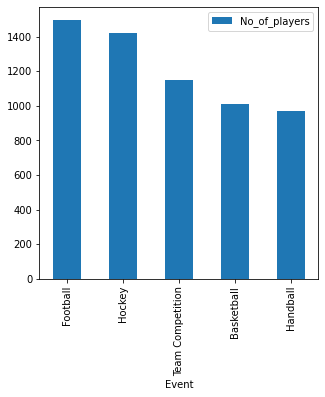

In [20]:
e.plot(x = 'Event', y = 'No_of_players', kind = 'bar', figsize = (5,5))

# **8. Which Sport is having most female Gold Medalists?(Top 5)**

In [22]:
gold = []
women_player = gold_data[gold_data['Gender']=='Women']

for sport in women_player['Sport'].unique():
  gold.append([sport,len(women_player[women_player['Sport']==sport])])

gold = pd.DataFrame(gold,columns=['Sport','female_gold_medalists']) 
w=gold.sort_values(by='female_gold_medalists',ascending=False).head()
w

,Sport,female_gold_medalists
4,Aquatics,589
7,Athletics,389
8,Gymnastics,268
14,Rowing,217
11,Volleyball,166


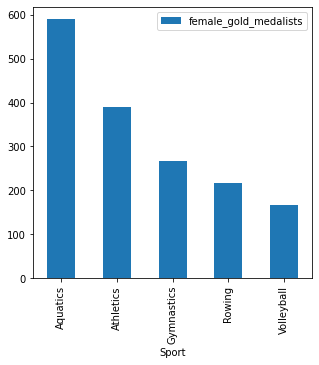

In [23]:
w.plot(x = 'Sport', y = 'female_gold_medalists', kind = 'bar', figsize = (5,5))